In [1]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
import time
import nltk
from nltk import word_tokenize
from tqdm import tqdm
from tqdm.notebook import tqdm
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
 
tqdm.pandas()

import warnings as wrn
wrn.filterwarnings('ignore')

/ext3/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = pd.read_csv('/vast/amr10211/sc-train.csv')
val = pd.read_csv('/vast/amr10211/sc-val.csv')
test = pd.read_csv('/vast/amr10211/sc-test.csv')

In [3]:
all_text = list(train['decision_text'])+list(val['decision_text'])+list(test['decision_text'])

In [4]:
length_list = [len(text) for text in all_text]


In [7]:
np.mean(length_list)

26312.55307473983

In [8]:
np.max(length_list)

534940

In [9]:
np.min(length_list)

18

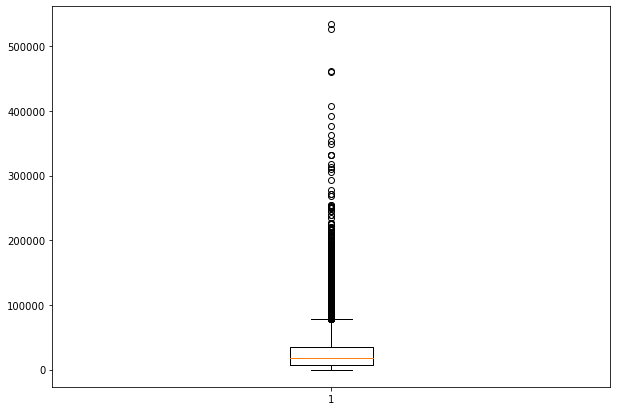

In [10]:

 
# Creating dataset
np.random.seed(10)
data = length_list
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

In [11]:
all_df = pd.concat([train,val,test], axis=0)


In [15]:
all_df['text_length'] = length_list

In [16]:
all_df

,Unnamed: 0,id,cluster_id,type,decision_text,date_filed,scdb_decision_direction,text_length
0,3,103341,103341,010combined,\n\n \n *18\n \n MR. Justice Black\n \n\n...,1940-05-20,2.0,28399
1,5,103343,103343,010combined,\n\n Me. Justice Reed\n \n\n delivered the o...,1940-04-22,2.0,21121
2,6,9419101,103344,020lead,\n*58Mr. Justice Frankfurter\ndelivered the op...,1940-04-22,2.0,19141
3,7,9419102,103344,040dissent,"\nMr. Justice Roberts,\ndissenting:\nI am unab...",1940-04-22,1.0,3374
4,11,103348,103348,010combined,\n\n \n *109\n \n Mr. Justice Murphy\n \n...,1940-05-20,2.0,9481
...,...,...,...,...,...,...,...,...
2613,26815,103037,103037,010combined,\n304 U.S. 307 (1938)\nJ.D. ADAMS MANUFACTURIN...,1938-05-16,1.0,51526
2614,26821,102807,102807,010combined,\n301 U.S. 103 (1937)\nASSOCIATED PRESS\nv.\nN...,1937-04-12,2.0,38033
2615,26848,109339,109339,010combined,\n\n Mr. Justice Marshall\n \n\n delivered t...,1976-01-13,1.0,20289
2616,26868,104473,104473,010combined,"\n332 U.S. 392 (1947)\nINTERNATIONAL SALT CO.,...",1947-11-17,2.0,26917


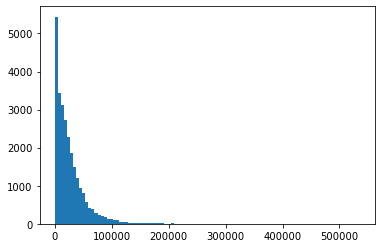

In [14]:
plt.hist(, bins=100);

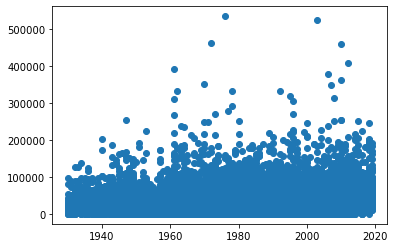

In [22]:
plt.plot(pd.to_datetime(all_df['date_filed']).dt.year,all_df['text_length'],'o')

In [23]:
np.median(length_list)

18338.0

In [27]:
all_df.sort_values('text_length', ascending = False)

,Unnamed: 0,id,cluster_id,type,decision_text,date_filed,scdb_decision_direction,text_length
17561,22372,109380,109380,010combined,\n424 U.S. 1 (1976)\nBUCKLEY ET AL.\nv.\nVALEO...,1976-02-27,2.0,534940
19956,25446,131149,131149,010combined,"\n540 U.S. 93 (2003)\nMcCONNELL, UNITED STATES...",2003-12-10,2.0,525918
2379,23622,108605,108605,010combined,\n408 U.S. 238 (1972)\nFURMAN\nv.\nGEORGIA.\nN...,1972-06-29,2.0,461262
2018,19791,149702,149702,010combined,"(Slip Opinion) OCTOBER TERM, 2009...",2010-06-28,1.0,459668
18690,23833,809122,809122,010combined,"(Slip Opinion) OCTOBER TERM, 2011...",2012-06-28,2.0,408240
...,...,...,...,...,...,...,...,...
13181,16857,9435158,145777,040dissent,"\n*681Justice Breyer, with whom Justice Steven...",2008-06-26,1.0,56
9408,11976,9428071,110337,030concurrence,\nMr. Justice Marshall\nconcurs in the judgmen...,1980-06-30,1.0,47
11364,14465,9431815,112320,030concurrence,\nJustice White\nconcurs in the judgment.\n,1989-06-23,2.0,40
5051,6428,9422182,106211,040dissent,\nMr. Justice Douglas\ndissents.\n,1961-04-17,1.0,31


In [44]:
np.min(all_df[all_df['scdb_decision_direction']==1.0]['text_length'])

18

In [43]:
np.min(all_df[all_df['scdb_decision_direction']==2.0]['text_length'])

40